# Import Base Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [2]:
import os
os.getcwd()

'C:\\Users\\Iamne\\Documents\\ML Final project'

In [3]:
import pandas as pd

trainData = pd.read_csv('C:\\Users\\Iamne\\Documents\\ML Final project\\Final Project\\Data\\Fruit_Train_Data.csv', sep=',')
testData = pd.read_csv('C:\\Users\\Iamne\\Documents\\ML Final project\\Final Project\\Data\\Fruit_Test_Data.csv', sep=',')
cvData = pd.read_csv('C:\\Users\\Iamne\\Documents\\ML Final project\\Final Project\\Data\\Fruit_CV_Data.csv', sep=',')
# allData = pd.read_csv('C:\\Users\\Iamne\\Documents\\ML Final project\\Final Project\\Data\\Fruit_All_Data.csv', sep=',')


In [4]:
# Assuming you have three DataFrames named df1, df2, and df3
allData = pd.concat([testData, trainData, cvData], ignore_index=True)

In [5]:
print("Number of rows :", allData.shape[0])
print("Number of columns :", allData.shape[1])

Number of rows : 4000
Number of columns : 8


In [6]:
allData.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

## Descriptive Statistics

In [7]:
allData.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


## Checking for NA data

In [8]:
allData.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

## Visualization

### Histogram

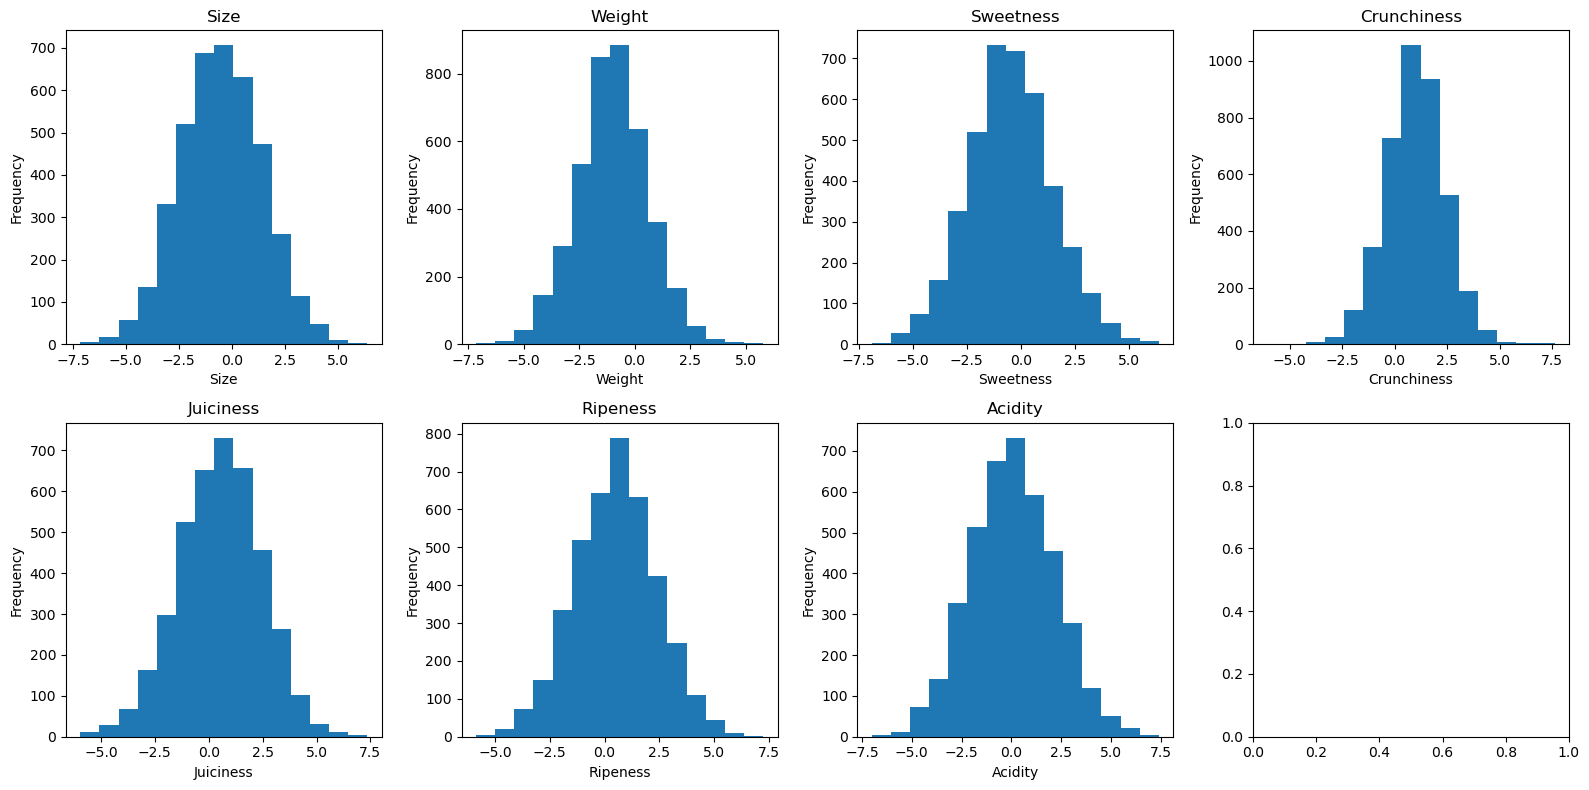

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Create a figure for subplots 
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust figure size as needed

# Loop through features and create subplots
for i, feature in enumerate(numerical_features):
    row = i // 4  # Integer division for row index
    col = i % 4  # Remainder for column index
    axes[row, col].hist(allData[feature], bins=15)
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout 
plt.tight_layout()

plt.show()

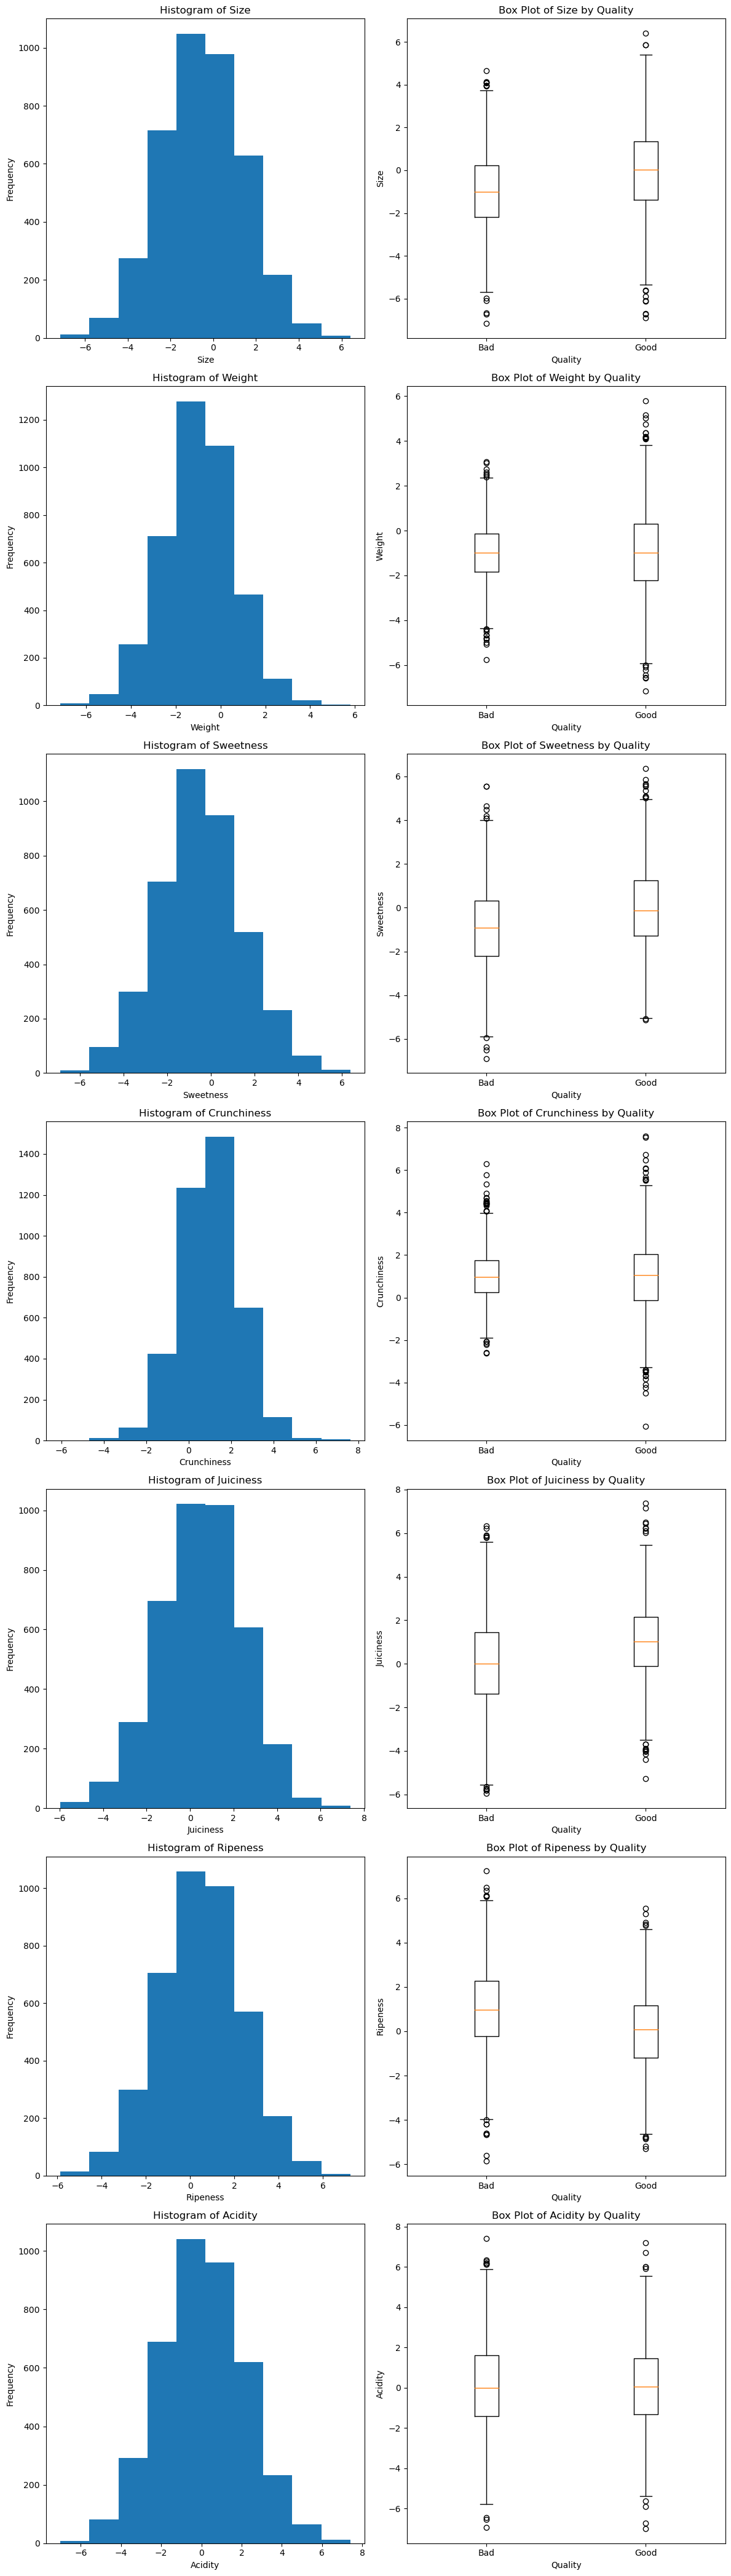

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical features (replace with your actual column names)
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Set the number of rows and columns for the subplots
num_features = len(numerical_features)
num_rows = num_features
num_cols = 2  # Two plots for each feature (histogram and box plot)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Loop through each feature and create histograms and box plots
for i, feature in enumerate(numerical_features):
    # Histogram
    axs[i, 0].hist(allData[feature])
    axs[i, 0].set_xlabel(feature)
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].set_title(f'Histogram of {feature}')

    # Box Plot
    # Filter data for quality 0 and 1
    quality_0_data = allData[allData['Quality'] == 0][feature]
    quality_1_data = allData[allData['Quality'] == 1][feature]

    axs[i, 1].boxplot([quality_0_data, quality_1_data], labels=['Bad', 'Good'])
    axs[i, 1].set_title(f'Box Plot of {feature} by Quality')
    axs[i, 1].set_xlabel('Quality')
    axs[i, 1].set_ylabel(feature)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

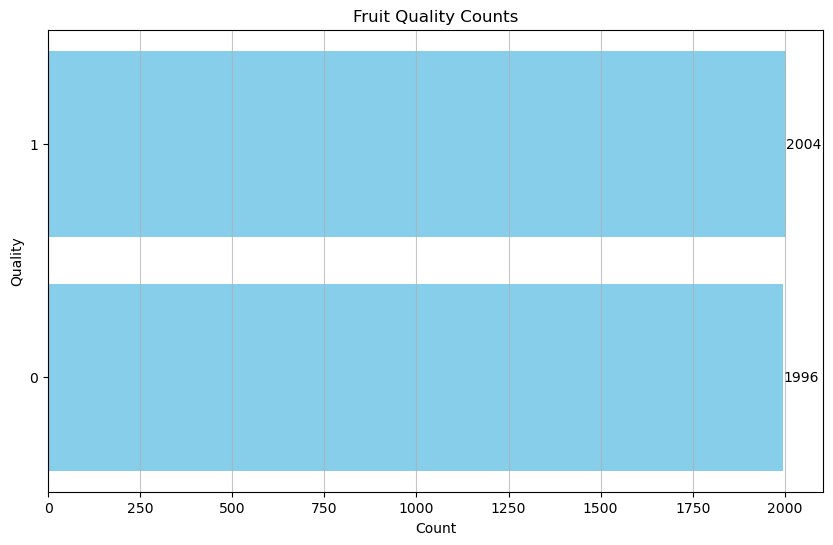

In [11]:
import matplotlib.pyplot as plt

value_counts = allData['Quality'].value_counts()

plt.figure(figsize=(10, 6)) 
bars = plt.barh(value_counts.index, value_counts.values, color='skyblue')

for bar, count in zip(bars, value_counts.values):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Quality')
plt.yticks([0, 1])
plt.title('Fruit Quality Counts')
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.show()

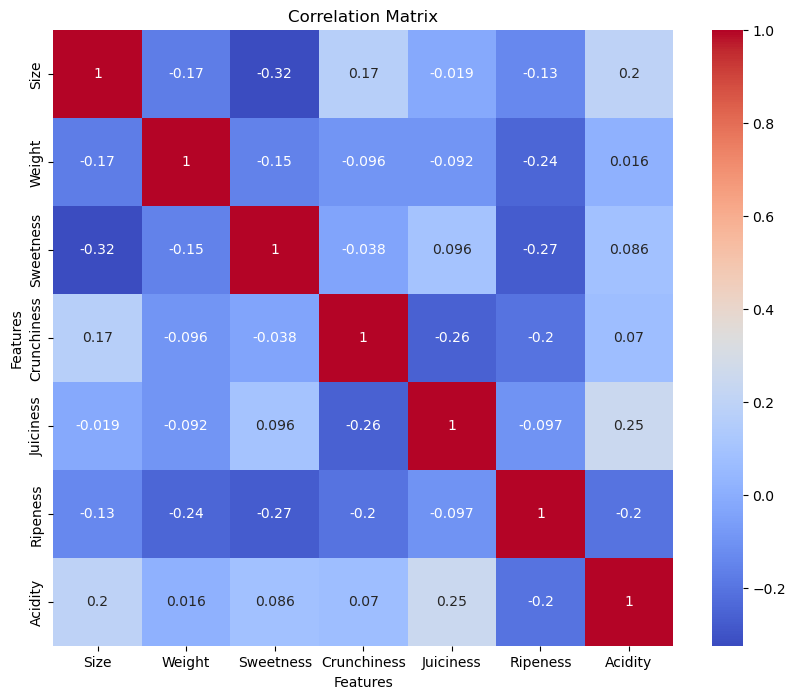

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Correlation matrix
correlation_matrix = allData[features].corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix')

plt.show()

In [13]:
allData['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [14]:
trainData['Quality'].value_counts()

Quality
0    1218
1    1182
Name: count, dtype: int64

Data is pratically class balance.

# Logistics Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Feature names
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Separate features and target variable
X_train = trainData[features]  
y_train = trainData['Quality'] 

# Create and train the Logistic Regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on validation data
X_cv = cvData[features]
y_cv = cvData['Quality']
y_cv_pred = model.predict(X_cv)

# Evaluate model performance on validation data
accuracy = accuracy_score(cvData['Quality'], y_cv_pred)
precision = precision_score(cvData['Quality'], y_cv_pred)
recall = recall_score(cvData['Quality'], y_cv_pred)
f1 = f1_score(cvData['Quality'], y_cv_pred)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(cvData['Quality'], y_cv_pred))

print("\nLogistic Regression Performance on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       390
           1       0.73      0.73      0.73       410

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800


Logistic Regression Performance on Validation Set:
Accuracy: 0.7262
Precision: 0.7335
Recall: 0.7317
F1-score: 0.7326


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Separate features and target variable
X_train = trainData[features] 
y_train = trainData['Quality']  

# Set up the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']  # Solvers for Logistic Regression
}

# Create the logistic regression model
model = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Create and train the Logistic Regression model with best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on validation data
X_cv = cvData[features]  
y_cv = cvData['Quality']
y_cv_pred = best_model.predict(X_cv)

# Evaluate model performance on validation data
accuracy = accuracy_score(cvData['Quality'], y_cv_pred)
precision = precision_score(cvData['Quality'], y_cv_pred)
recall = recall_score(cvData['Quality'], y_cv_pred)
f1 = f1_score(cvData['Quality'], y_cv_pred)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(cvData['Quality'], y_cv_pred))

print("\nLogistic Regression Performance on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       390
           1       0.74      0.74      0.74       410

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800


Logistic Regression Performance on Validation Set:
Accuracy: 0.7312
Precision: 0.7372
Recall: 0.7390
F1-score: 0.7381


C:\Users\Iamne\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


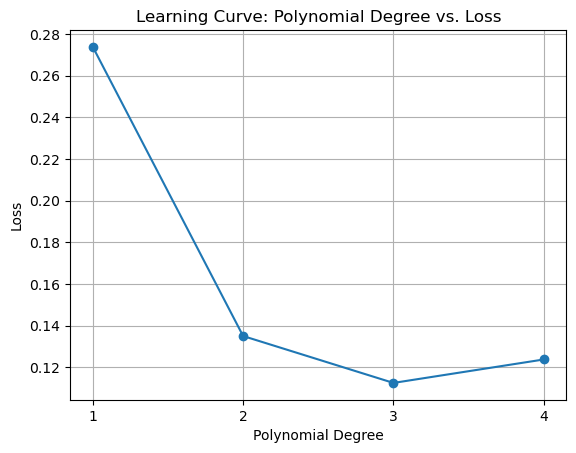

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Define the range of polynomial degrees
degrees = np.arange(1, 5) 

# Lists to store polynomial degrees and validation MSE
degrees_list = []
val_mse_list = []

# Loop over each polynomial degree
for degree in degrees:
    # Create a pipeline with PolynomialFeatures and LogisticRegression
    model = make_pipeline(PolynomialFeatures(degree), LogisticRegression(solver='lbfgs', max_iter=500))
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation data
    y_cv_pred = model.predict(X_cv)
    
    # Calculate Mean Squared Error on the validation data
    val_mse = mean_squared_error(y_cv, y_cv_pred)
    
    # Append to lists
    degrees_list.append(degree)
    val_mse_list.append(val_mse)

# Plot the learning curve graph
plt.plot(degrees_list, val_mse_list, marker='o')
plt.title('Learning Curve: Polynomial Degree vs. Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.xticks(degrees_list)
plt.grid(True)
plt.show()


In [18]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=3)

# Transform the original features to polynomial features
X_poly_train = poly.fit_transform(X_train)
X_poly_cv = poly.transform(X_cv)

# Define hyperparameter grid for C (regularization strength)
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
              'max_iter':[100, 500, 1000]}

# Create Logistic Regression model with L2 regularization
model = LogisticRegression(random_state=42, solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Train the model with GridSearchCV
grid_search.fit(X_poly_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on validation data using the best model
y_cv_pred = best_model.predict(X_poly_cv)

# Evaluate model performance on validation data
accuracy = accuracy_score(y_cv, y_cv_pred)
precision = precision_score(y_cv, y_cv_pred)
recall = recall_score(y_cv, y_cv_pred)
f1 = f1_score(y_cv, y_cv_pred)

print("Logistic Regression (L2 Regularization) Performance on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

Logistic Regression (L2 Regularization) Performance on Validation Set:
Accuracy: 0.8850
Precision: 0.9015
Recall: 0.8707
F1-score: 0.8859
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1'}


In [19]:
from sklearn.model_selection import cross_validate

# Perform k-fold cross-validation with 5 folds
cv_results = cross_validate(best_model, X_poly_train, y_train, cv=5, scoring=['accuracy', 'f1_macro'])

# Get mean accuracy and F1-score across all folds
mean_accuracy = np.mean(cv_results['test_accuracy'])
mean_f1_score = np.mean(cv_results['test_f1_macro'])

print("Mean Accuracy:", mean_accuracy)
print("Mean F1-score:", mean_f1_score)

Mean Accuracy: 0.8945833333333333
Mean F1-score: 0.894542043584757


In [20]:
from sklearn.model_selection import cross_validate

# Perform k-fold cross-validation with 5 folds
cv_results = cross_validate(best_model, X_poly_train, y_train, cv=5, scoring=['accuracy', 'f1_macro'])

# Get mean accuracy and F1-score across all folds
mean_accuracy = np.mean(cv_results['test_accuracy'])
mean_f1_score = np.mean(cv_results['test_f1_macro'])

print("Mean Accuracy:", mean_accuracy)
print("Mean F1-score:", mean_f1_score)

Mean Accuracy: 0.8945833333333333
Mean F1-score: 0.894542043584757


### F1-Score Curve

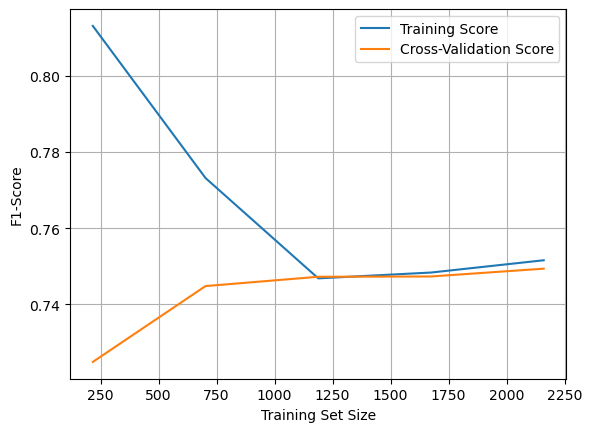

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, cv_scores = learning_curve(best_model, X_train, y_train, cv=10, scoring='f1_macro')

import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, cv_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

start_time = time.time()  # Record start time before GridSearchCV
# Feature names (replace with your actual feature names)
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Separate features and target variable
X_train = trainData[features]  # Features for training data
y_train = trainData['Quality']  # Target variable for training data

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators (number of trees) as needed
model.fit(X_train, y_train)

# Make predictions on validation data
X_cv = cvData[features]  # Features for validation data
y_cv_pred = model.predict(X_cv)

# Evaluate model performance on validation data (replace with metrics you prefer)
accuracy = accuracy_score(cvData['Quality'], y_cv_pred)
precision = precision_score(cvData['Quality'], y_cv_pred)
recall = recall_score(cvData['Quality'], y_cv_pred)
f1 = f1_score(cvData['Quality'], y_cv_pred)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(cvData['Quality'], y_cv_pred))

print("\nRandom Forest Performance on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


end_time = time.time()  # Record end time after training
execution_time = end_time - start_time

print(f"Total Execution Time (Training): {execution_time:.2f} seconds")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       390
           1       0.90      0.90      0.90       410

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800


Random Forest Performance on Validation Set:
Accuracy: 0.8975
Precision: 0.9000
Recall: 0.9000
F1-score: 0.9000
Total Execution Time (Training): 0.53 seconds


In [23]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Assuming your code for GridSearchCV and model training is within a function (grid_search_rf)

start_time = time.time()  # Record start time before GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 400],  # Increased range for number of trees
    'max_depth': [5, 10, 15],  # Increased range for maximum depth not exceed 15
    'min_samples_split': [5, 10, 15],  # Increased range for minimum samples to split
    'min_samples_leaf': [2, 4, 8, 16]   # Increased range for minimum samples per leaf more than 1
}
# Create Random Forest model with L2 regularization
model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object with F1-score and n_jobs=-1 for parallel processing
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on validation data using the best model
X_cv = cvData[features]  # Features for validation data
y_cv_pred = best_model.predict(X_cv)

# Evaluate model performance on validation data (including F1-score)
accuracy = accuracy_score(cvData['Quality'], y_cv_pred)
precision = precision_score(cvData['Quality'], y_cv_pred)
recall = recall_score(cvData['Quality'], y_cv_pred)
f1 = f1_score(cvData['Quality'], y_cv_pred)

print("Random Forest (L2 Regularization) Performance on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

end_time = time.time()  # Record end time after training
execution_time = end_time - start_time

print(f"Total Execution Time (GridSearchCV and Training): {execution_time:.2f} seconds")

Random Forest (L2 Regularization) Performance on Validation Set:
Accuracy: 0.8875
Precision: 0.8941
Recall: 0.8854
F1-score: 0.8897
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
Total Execution Time (GridSearchCV and Training): 118.80 seconds


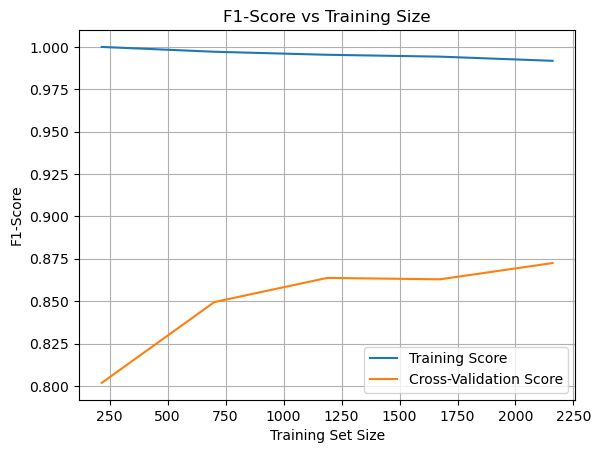

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define model (same Random Forest from GridSearchCV)
model = RandomForestClassifier(**grid_search.best_params_)  # Use best hyperparameters

train_sizes, train_scores, cv_scores = learning_curve(best_model, X_train, y_train, cv=10, scoring='f1_macro')

import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, cv_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Training Size')
plt.legend()
plt.grid(True)
plt.show()

# SVM

In [25]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create SVC model with default hyperparameters
model = SVC(random_state=42)

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the labels for the test fold
    y_pred_fold = model.predict(X_test_fold)
    
    # Calculate accuracy for the test fold and store it
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

# Calculate average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average accuracy
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8854166666666666


In [26]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Assuming your data is loaded into pandas DataFrames
# - X_train: Features for training data
# - y_train: Target variable (fruit quality) for training data

# Standardize features (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define hyperparameter grid for GridSearchCV
param_grid = {
  'C': [0.1, 1, 10],  # Regularization parameter
  'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel functions to try
  'gamma': [0.01, 0.1, 1]  # Hyperparameter for RBF kernel (if used)
}

# Create SVC model
model = SVC(random_state=42)

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# **Combine GridSearchCV with k-Fold CV**
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Train the model with GridSearchCV on scaled features
grid_search.fit(X_train_scaled, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# **Print Best Hyperparameters (optional)**
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [27]:
from sklearn.metrics import accuracy_score

accuracy_scores = []
for train_index, cv_index in kf.split(X_train_scaled):
    X_train_fold, X_cv_fold = X_train_scaled[train_index], X_train_scaled[cv_index]
    y_train_fold, y_cv_fold = y_train[train_index], y_train[cv_index]
    
    # Train the best model on the training fold
    best_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_pred = best_model.predict(X_cv_fold)
    
    # Evaluate accuracy on the validation fold
    accuracy_fold = accuracy_score(y_cv_fold, y_pred)
    accuracy_scores.append(accuracy_fold)

# Print average accuracy across folds
print(f"Average Accuracy (SVM with Best Hyperparameters, K-Fold CV): {np.mean(accuracy_scores):.4f}") 
print(accuracy_scores)


Average Accuracy (SVM with Best Hyperparameters, K-Fold CV): 0.8992
[0.9145833333333333, 0.8833333333333333, 0.875, 0.8958333333333334, 0.9270833333333334]


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize lists to store cross-validated accuracy and validation MSE for each degree
degrees = np.arange(1, 5)
cv_accuracies = []
val_mses = []

for degree in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    
    # Standardize features after polynomial transformation
    scaler = StandardScaler()
    X_train_scaled_poly = scaler.fit_transform(X_train_poly)
    
    # Define hyperparameter grid for GridSearchCV
    param_grid = {
        'svc__C': [0.1, 1, 10],  # Regularization parameter
        'svc__kernel': ['linear', 'rbf', 'sigmoid'], 
        'svc__gamma': [0.01, 0.1, 1]  # Hyperparameter for RBF kernel
    }

    # Create SVC model with pipeline
    model = make_pipeline(StandardScaler(), SVC(random_state=42))
    
    # Define k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True)
    
    # Combine GridSearchCV with k-Fold CV
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    
    # Perform cross-validation
    cv_accuracy = np.mean(cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='accuracy'))
    cv_accuracies.append(cv_accuracy)
    
    # Train the model with GridSearchCV
    grid_search.fit(X_train_scaled_poly, y_train)
    
    # Get the best model with tuned hyperparameters
    best_model = grid_search.best_estimator_
    
    # Get validation MSE
    val_mse = 1 - grid_search.best_score_
    val_mses.append(val_mse)
    
    # Print Cross-Validated Accuracy and Best Hyperparameters for the current degree
    print(f"Degree {degree}:")
    print("Cross-Validated Accuracy:", cv_accuracy)
    print("Best Hyperparameters:", grid_search.best_params_)
    print()

Degree 1:
Cross-Validated Accuracy: 0.89125
Best Hyperparameters: {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

Degree 2:
Cross-Validated Accuracy: 0.8991666666666666
Best Hyperparameters: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Degree 3:
Cross-Validated Accuracy: 0.8991666666666667
Best Hyperparameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}

Degree 4:
Cross-Validated Accuracy: 0.8941666666666667
Best Hyperparameters: {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}



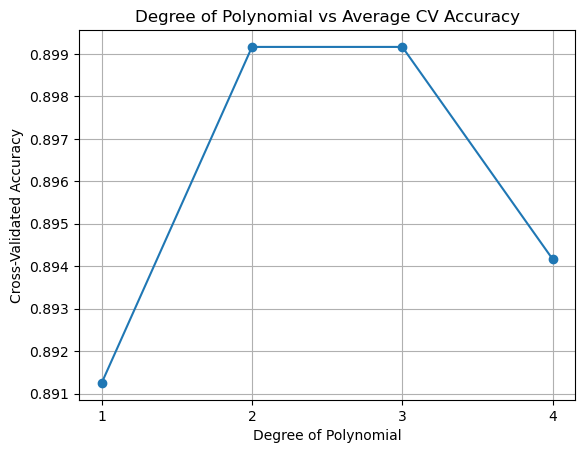

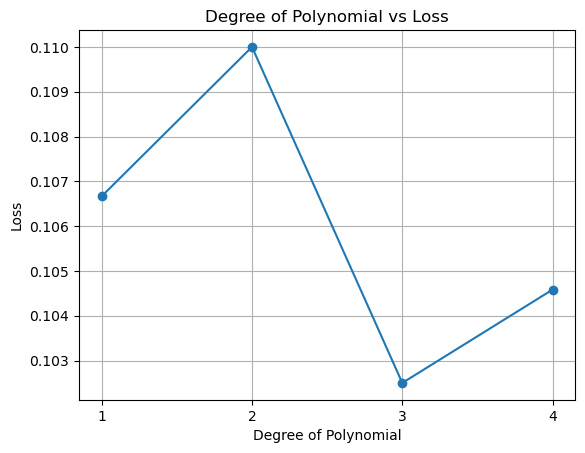

In [40]:
# Plot Degree of polynomial vs Cross-Validated Accuracy
plt.plot(degrees, cv_accuracies, marker='o')
plt.title('Degree of Polynomial vs Average CV Accuracy')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# Plot Degree of polynomial vs Validation MSE
plt.plot(degrees, val_mses, marker='o')
plt.title('Degree of Polynomial vs Loss')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Loss')
plt.xticks(degrees)
plt.grid(True)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Generate polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Standardize features after polynomial transformation
scaler = StandardScaler()
X_train_scaled_poly = scaler.fit_transform(X_train_poly)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel functions to try
    'svc__gamma': [0.01, 0.1, 1]  # Hyperparameter for RBF kernel (if used)
}

# Create SVC model with pipeline
model = make_pipeline(StandardScaler(), SVC(random_state=42))

# Define k-fold cross-validation
kf = KFold(n_splits=5)

# Combine GridSearchCV with k-Fold CV
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Print Best Hyperparameters (optional)
print("Best Hyperparameters:", grid_search.best_params_)

cv_accuracy = grid_search.best_score_
print("Cross-Validated Accuracy with Best Hyperparameters:", cv_accuracy)


Best Hyperparameters: {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Cross-Validated Accuracy with Best Hyperparameters: 0.9004166666666666


# Neural Network

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X_cv, y_cv = cvData[features], cvData['Quality']
X_test, y_test = testData[features], testData['Quality']

# Define the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(7,)),  # Input layer with 7 features
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(16, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_cv, y_cv), verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_cv, y_cv)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/50


C:\Users\Iamne\anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4920 - loss: 0.8552 - val_accuracy: 0.6200 - val_loss: 0.6449
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6320 - val_accuracy: 0.7212 - val_loss: 0.5623
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.5836 - val_accuracy: 0.7563 - val_loss: 0.5152
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7409 - loss: 0.5223 - val_accuracy: 0.7663 - val_loss: 0.4846
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7636 - loss: 0.4822 - val_accuracy: 0.7912 - val_loss: 0.4557
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.4593 - val_accuracy: 0.8037 - val_loss: 0.4276
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.7826 - loss: 0.4522 - val_accuracy: 0.8163 - val_loss: 0.4085
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8180 - loss: 0.4150 - val_accuracy: 0.8288 - val_loss: 0.3929

Epoch 1/150


C:\Users\Iamne\anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6531 - loss: 0.6325 - val_accuracy: 0.7925 - val_loss: 0.4461
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4341 - val_accuracy: 0.8275 - val_loss: 0.3769
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3809 - val_accuracy: 0.8512 - val_loss: 0.3461
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3420 - val_accuracy: 0.8562 - val_loss: 0.3250
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3346 - val_accuracy: 0.8612 - val_loss: 0.3144
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.3336 - val_accuracy: 0.8612 - val_loss: 0.3117
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3195 - val_accuracy: 0.8675 - val_loss: 0.2945
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.3003 - val_accuracy: 0.8763 - val_loss: 0.2

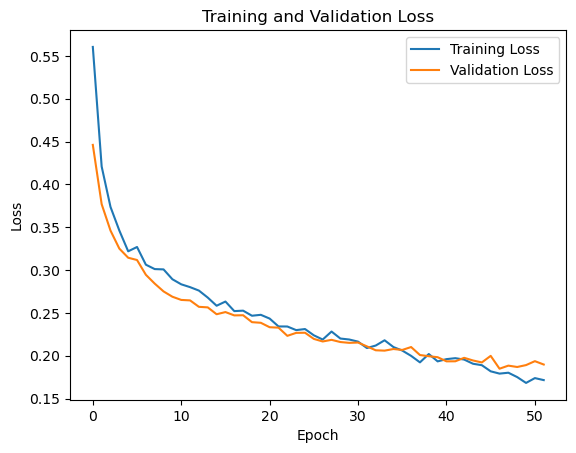

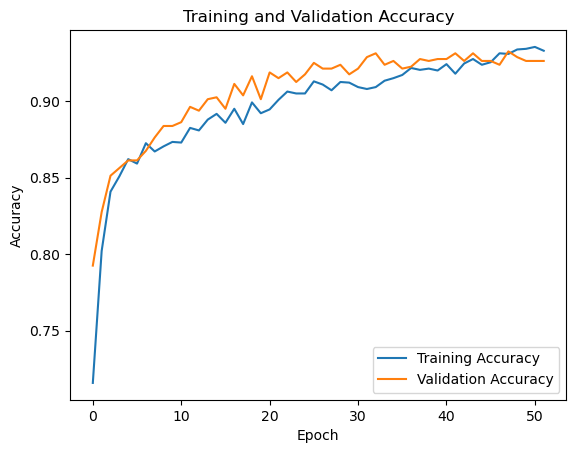

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_cv, y_cv = cvData[features], cvData['Quality']
X_test, y_test = testData[features], testData['Quality']

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),  # Input layer with 7 features
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs = 150, batch_size=32, 
                    validation_data=(X_cv, y_cv), verbose=1, callbacks=[early_stop])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_cv, y_cv)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [45]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input  # Import Input layer from Keras

In [46]:
def objective(trial):
    # Define hyperparameter search space
    units = trial.suggest_int('units', 32, 512, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5, step=0.1)
    learning_rate = trial.suggest_categorical('learning_rate', [1e-2, 1e-3, 1e-4])
    
    epoch = 50
    batch_size = 32

    # Define the neural network model
    model = Sequential()
    model.add(Input(shape=(7,)))  # Input layer using Input(shape)
    model.add(Dense(units, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_cv, y_cv), verbose=0)

    # Evaluate the model on the validation data
    score = model.evaluate(X_cv, y_cv, verbose=0)

    return score[1]  # Return validation accuracy as the objective to maximize

# Create Optuna study object
study = optuna.create_study(direction='maximize')

# Run optimization
study.optimize(objective, n_trials=50, n_jobs=5)

# Get the best hyperparameters
best_params = study.best_params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_score)

[I 2024-04-29 23:00:57,573] A new study created in memory with name: no-name-66ee3aaf-60fd-4fe3-affb-81c5f895eb22
[I 2024-04-29 23:01:15,552] Trial 3 finished with value: 0.9287499785423279 and parameters: {'units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.01}. Best is trial 3 with value: 0.9287499785423279.
[I 2024-04-29 23:01:15,657] Trial 2 finished with value: 0.9512500166893005 and parameters: {'units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.01}. Best is trial 2 with value: 0.9512500166893005.
[I 2024-04-29 23:01:15,659] Trial 1 finished with value: 0.8512499928474426 and parameters: {'units': 192, 'dropout_rate': 0.2, 'learning_rate': 0.0001}. Best is trial 2 with value: 0.9512500166893005.
[I 2024-04-29 23:01:17,988] Trial 0 finished with value: 0.8700000047683716 and parameters: {'units': 448, 'dropout_rate': 0.4, 'learning_rate': 0.0001}. Best is trial 2 with value: 0.9512500166893005.
[I 2024-04-29 23:01:18,636] Trial 4 finished with value: 0.87000000

[I 2024-04-29 23:03:44,027] Trial 40 finished with value: 0.9287499785423279 and parameters: {'units': 448, 'dropout_rate': 0.0, 'learning_rate': 0.01}. Best is trial 37 with value: 0.9549999833106995.
[I 2024-04-29 23:03:44,060] Trial 41 finished with value: 0.8075000047683716 and parameters: {'units': 32, 'dropout_rate': 0.0, 'learning_rate': 0.0001}. Best is trial 37 with value: 0.9549999833106995.
[I 2024-04-29 23:03:45,837] Trial 43 finished with value: 0.8149999976158142 and parameters: {'units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0001}. Best is trial 37 with value: 0.9549999833106995.
[I 2024-04-29 23:03:46,634] Trial 42 finished with value: 0.7887499928474426 and parameters: {'units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0001}. Best is trial 37 with value: 0.9549999833106995.
[I 2024-04-29 23:03:53,833] Trial 44 finished with value: 0.8512499928474426 and parameters: {'units': 96, 'dropout_rate': 0.30000000000000004, 'learning_rat

Best Hyperparameters: {'units': 448, 'dropout_rate': 0.2, 'learning_rate': 0.01}
Best Validation Accuracy: 0.9549999833106995


In [48]:
def objective(trial):
    units = trial.suggest_int('units', 16, 192, step=16)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5, step=0.1)
    learning_rate = trial.suggest_categorical('learning_rate', [1e-2])
    num_layers = trial.suggest_int('num_layers', 1, 5)

    epoch = 50
    batch_size = 32
    
    # Define early stopping criteria
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    model = Sequential()
    model.add(Input(shape=(7,)))
    
    for _ in range(num_layers):
        model.add(Dense(units, activation='relu'))
        
    model.add(Dropout(dropout_rate))    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_cv, y_cv), verbose=0)

    score = model.evaluate(X_cv, y_cv, verbose=0)

    return score[1]

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=5)

best_params = study.best_params
best_score = study.best_value

[I 2024-04-29 23:07:09,501] A new study created in memory with name: no-name-a0928fd4-b5f5-4fdf-8992-90bf75276fdc
[I 2024-04-29 23:07:31,644] Trial 4 finished with value: 0.9137499928474426 and parameters: {'units': 48, 'dropout_rate': 0.4, 'learning_rate': 0.01, 'num_layers': 1}. Best is trial 4 with value: 0.9137499928474426.
[I 2024-04-29 23:07:35,059] Trial 2 finished with value: 0.9424999952316284 and parameters: {'units': 176, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 4}. Best is trial 2 with value: 0.9424999952316284.
[I 2024-04-29 23:07:35,166] Trial 1 finished with value: 0.9399999976158142 and parameters: {'units': 80, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 2 with value: 0.9424999952316284.
[I 2024-04-29 23:07:38,199] Trial 3 finished with value: 0.9212499856948853 and parameters: {'units': 160, 'dropout_rate': 0.4, 'learning_rate': 0.01, 'num_layers': 5}. Best is trial 2 with value: 0.9424999952316284.
[I 2

[I 2024-04-29 23:10:26,986] Trial 37 finished with value: 0.9350000023841858 and parameters: {'units': 192, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 36 with value: 0.9449999928474426.
[I 2024-04-29 23:10:34,103] Trial 38 finished with value: 0.949999988079071 and parameters: {'units': 64, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:10:36,801] Trial 39 finished with value: 0.9449999928474426 and parameters: {'units': 176, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:10:41,118] Trial 40 finished with value: 0.9474999904632568 and parameters: {'units': 176, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:10:42,712] Trial 41 finished with value: 0.9474999904632568 and parameters: {'un

[I 2024-04-29 23:13:11,659] Trial 73 finished with value: 0.9300000071525574 and parameters: {'units': 64, 'dropout_rate': 0.0, 'learning_rate': 0.01, 'num_layers': 3}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:13:14,722] Trial 76 finished with value: 0.9287499785423279 and parameters: {'units': 176, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:13:15,468] Trial 75 finished with value: 0.9412500262260437 and parameters: {'units': 176, 'dropout_rate': 0.0, 'learning_rate': 0.01, 'num_layers': 3}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:13:20,097] Trial 77 finished with value: 0.949999988079071 and parameters: {'units': 176, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 2}. Best is trial 38 with value: 0.949999988079071.
[I 2024-04-29 23:13:34,573] Trial 78 finished with value: 0.925000011920929 and parameters: {'units': 48, 'dropout_rate': 0.1, 'le

In [58]:
best_params['units'] = 144
best_params['num_layers'] = 2
best_params['dropout_rate'] = 0.5
best_params

{'units': 144, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_layers': 2}

In [59]:
# Train a final model using the optimized hyperparameters on the combined training and validation datasets
final_model = Sequential()
final_model.add(Input(shape=(7,)))
for _ in range(best_params['num_layers']):
    final_model.add(Dense(best_params['units'], activation='relu'))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer=Adam(best_params['learning_rate']), loss='binary_crossentropy', metrics=['accuracy'])

# Combine the training and validation datasets
X_train_final = np.concatenate((X_train, X_cv), axis=0)
y_train_final = np.concatenate((y_train, y_cv), axis=0)

# Train the final model on the combined training and validation datasets
# final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
final_model.fit(X_train_final, y_train_final, epochs=50, batch_size=32, verbose=0)

# Evaluate the final model on the test dataset
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)

print("Optimal Hyperparameters:", best_params)
print("Validation Accuracy:", best_score)
# print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9395 - loss: 0.1741  
Optimal Hyperparameters: {'units': 144, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_layers': 2}
Validation Accuracy: 0.9458333253860474
Test Accuracy: 0.9462500214576721
